In [1]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('paxel_id.csv')
#only keep caption column 
df1 = df[['caption']]
df1 = df1.dropna()

In [3]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [4]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_42399/1854476216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'][i] = review.replace('0', row['caption'])


In [5]:
df1 = df1.rename(columns={'reviews': 'paxel Reviews'})
df1

,index,caption,middle,paxel Reviews
0,0,JASA PAKET ANEH DAN GA ADA ATTDNYA. KALO SUDAH...,NaN,JASA PAKET ANEH DAN GA ADA ATTDNYA. KALO SUDAH...
1,1,(Translated by Google) Thank God I had a good ...,Thank God I had a good experience with Paxel....,Thank God I had a good experience with Paxel....
2,2,(Translated by Google) 3 x sending with frozen...,3 x sending with frozen food facilities but a...,3 x sending with frozen food facilities but a...
3,3,(Translated by Google) Items are lost on the w...,"Items are lost on the way, what kind of couri...","Items are lost on the way, what kind of couri..."
4,4,(Translated by Google) My package receipt numb...,My package receipt number TPXL-0000000FJRV is...,My package receipt number TPXL-0000000FJRV is...
...,...,...,...,...
387,550,After experiences with so many of the other co...,NaN,After experiences with so many of the other co...
388,554,(Translated by Google) It's cool (Original) K...,It's cool (Original,It's cool
389,555,(Translated by Google) Cool concept of sending...,Cool concept of sending the items ... really ...,Cool concept of sending the items ... really ...
390,560,Fast Same-Day delivery service & Real-time update,NaN,Fast Same-Day delivery service & Real-time update


In [6]:
df1['paxel Reviews'].to_csv('paxel1.csv')

### Clean the data

In [8]:
df_combi = pd.read_csv('paxel1.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['clean_1'] = pd.DataFrame(df_combi['paxel Reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,paxel Reviews,clean_1
0,0,JASA PAKET ANEH DAN GA ADA ATTDNYA. KALO SUDAH...,jasa paket aneh dan ga ada attdnya kalo sudah ...
1,1,Thank God I had a good experience with Paxel....,thank god good experience paxel time flat rate...
2,2,3 x sending with frozen food facilities but a...,x sending frozen food facilities arriving dest...
3,3,"Items are lost on the way, what kind of couri...",items lost way kind courier trustworthy work r...
4,4,My package receipt number TPXL-0000000FJRV is...,package receipt number missing sent wrong cour...
...,...,...,...
387,387,After experiences with so many of the other co...,experiences many courier services available lo...
388,388,It's cool,cool
389,389,Cool concept of sending the items ... really ...,cool concept sending items really cheap jabode...
390,390,Fast Same-Day delivery service & Real-time update,fast sameday delivery service realtime update


### Sentiment analysis 


In [9]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['clean_2'] = pd.DataFrame(df_combi['clean_1'].apply(clean_text_round2))


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['paxel Reviews'].apply(sentiment_scores))

In [11]:
df_combi

,Unnamed: 0,paxel Reviews,clean_1,clean_2,sentiment
0,0,JASA PAKET ANEH DAN GA ADA ATTDNYA. KALO SUDAH...,jasa paket aneh dan ga ada attdnya kalo sudah ...,jasa paket aneh dan ga ada attdnya kalo sudah ...,Neutral
1,1,Thank God I had a good experience with Paxel....,thank god good experience paxel time flat rate...,thank god good experience paxel time flat rate...,Positive
2,2,3 x sending with frozen food facilities but a...,x sending frozen food facilities arriving dest...,x sending frozen food facility arriving destin...,Neutral
3,3,"Items are lost on the way, what kind of couri...",items lost way kind courier trustworthy work r...,item lost way kind courier trustworthy work re...,Negative
4,4,My package receipt number TPXL-0000000FJRV is...,package receipt number missing sent wrong cour...,package receipt number missing sent wrong cour...,Negative
...,...,...,...,...,...
387,387,After experiences with so many of the other co...,experiences many courier services available lo...,experience many courier service available loca...,Positive
388,388,It's cool,cool,cool,Positive
389,389,Cool concept of sending the items ... really ...,cool concept sending items really cheap jabode...,cool concept sending item really cheap jabodet...,Positive
390,390,Fast Same-Day delivery service & Real-time update,fast sameday delivery service realtime update,fast sameday delivery service realtime update,Neutral


In [12]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg = df_neg[['clean_2']]
df_neg

,clean_2
3,item lost way kind courier trustworthy work re...
4,package receipt number missing sent wrong cour...
17,bad expedition said service frozen product tri...
18,customer service chat wa also bot chat dont nu...
19,minus star package went stale ordered frozen f...
...,...
350,bona fide courier service said one day service...
351,good delivery service management quite good of...
356,disappointing see big mango area today want ac...
363,bad


In [13]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['clean_2'].str.cat(sep=' ')

In [14]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 161),
 ('service', 96),
 ('package', 79),
 ('day', 56),
 ('bad', 53),
 ('paxel', 48),
 ('customer', 46),
 ('courier', 33),
 ('arrived', 33),
 ('food', 32),
 ('c', 31),
 ('time', 27),
 ('really', 25),
 ('even', 25),
 ('wa', 24),
 ('good', 24),
 ('delivery', 23),
 ('sent', 21),
 ('call', 21),
 ('arrive', 21),
 ('pick', 21),
 ('though', 20),
 ('number', 19),
 ('hour', 19),
 ('dont', 18),
 ('phone', 18),
 ('use', 18),
 ('item', 17),
 ('said', 17),
 ('using', 17),
 ('one', 17),
 ('disappointed', 16),
 ('send', 15),
 ('also', 15),
 ('contacted', 15),
 ('contact', 15),
 ('still', 15),
 ('complaint', 15),
 ('response', 15),
 ('didnt', 15),
 ('want', 14),
 ('frozen', 14),
 ('hasnt', 14),
 ('doesnt', 13),
 ('picked', 13),
 ('order', 13),
 ('chat', 12),
 ('via', 12),
 ('yet', 12),
 ('status', 12),
 ('already', 12),
 ('give', 12),
 ('lost', 11),
 ('morning', 11),
 ('expedition', 10),
 ('answer', 10),
 ('pm', 10),
 ('never', 10),
 ('center', 10),
 ('first', 10),
 ('whatsapp', 10),
 ('picku

In [15]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'call', 'dont', 'cant']
stop_words = add_stop_words + stop 

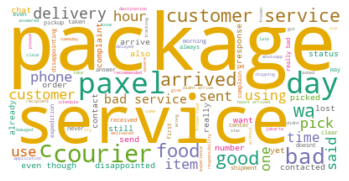

In [16]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

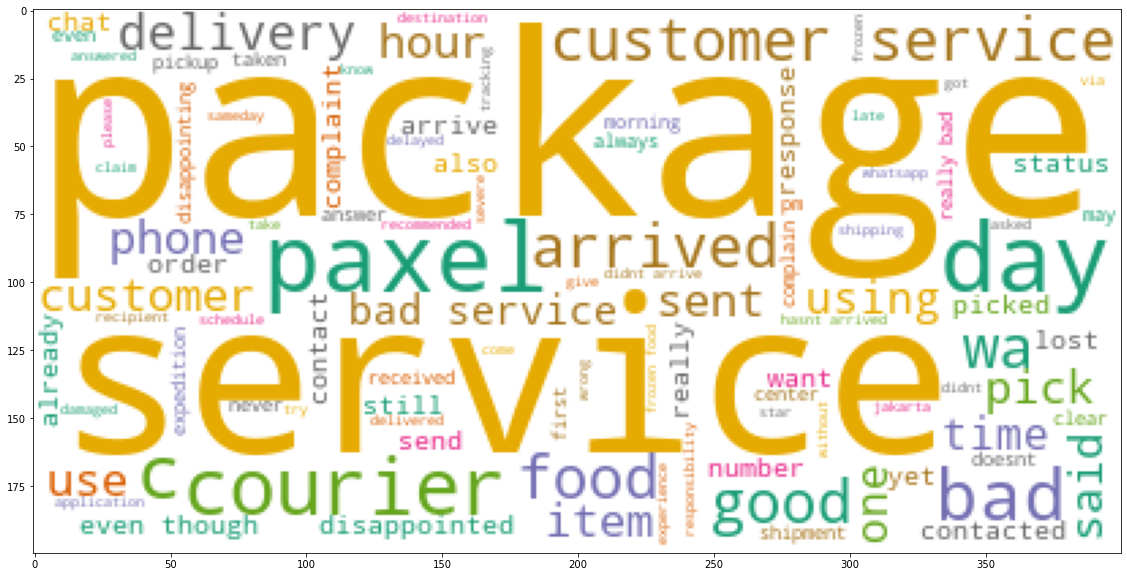

In [17]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [18]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['clean_2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'clean_2':'Late reviews'})

In [19]:
df_late

,Late reviews
29,delivery tangsel using day service arrive nigh...
40,application clearcs doesnt helpthe bot answere...
48,contact contacted package late lost c via wa e...
55,really bad morning pickup set canceled unilate...
56,c package late hour still delivered although p...
67,severe super duper bad professionalnot timeno ...
73,bad service can not contect call center respon...
92,delivery schedule customer service can not rea...
95,late send package professional give confirmati...
107,hour later response hq kind service paxel give...


In [20]:
df_late.to_csv('Late_reviews_paxel.csv')